## Line-depth dependence of convective blueshift

In [2]:
#Libraries
from astropy.io import fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

#Configuration for the font and style in the graphics
params = {
        'font.family': 'serif',
        'font.serif': ['STIXGeneral', 'Times New Roman'],
        'font.size': 14,
        'axes.labelsize': 14,
        'axes.titlesize': 16,
        'legend.fontsize': 14,
        'xtick.labelsize': 14,
        'ytick.labelsize': 14,
        'mathtext.fontset': 'stix',
        'text.usetex': False,
        'figure.figsize': (6.4, 4.8),
        'savefig.format': 'pdf',
        'savefig.bbox': 'tight'
    }
    
plt.rcParams.update(params)

In [3]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Visible range\Data\Values_VIS.xlsx")
NIR_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Infrared range\Data\Values_NIR.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Spatially Resolved Atlas\Data\Values_SPA.xlsx")
ALL_data = pd.concat([VIS_data,NIR_data],axis=0).drop_duplicates('Observed wavelength',keep='first').reset_index(drop=True) #Dont take repeated values when concatenate
 
#colors for the plot
colors_fit = ['purple','blue','cyan','green','yellow','orange','red','brown','darkred']

### Granulation patterns

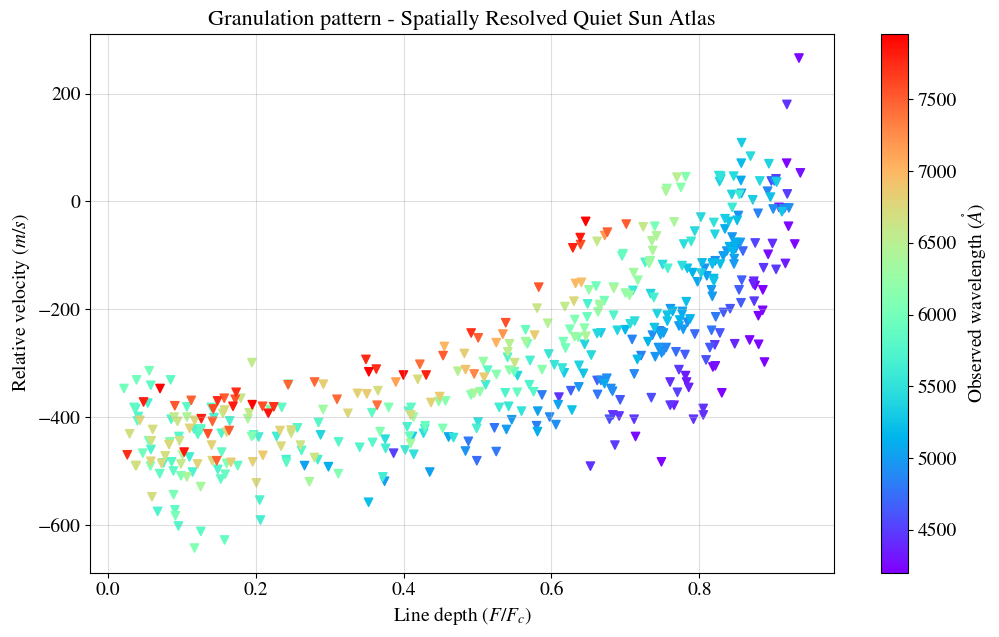

In [ ]:
fig1, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(SPA_data['Line Depth'],SPA_data['Velocity'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax.set_title('Granulation pattern - Spatially Resolved Quiet Sun Atlas')
ax.set_xlabel(r'Line depth $(F/F_{c})$')
ax.set_ylabel(r'Relative velocity $(m/s)$')

ax.grid(alpha=0.4)

# fig1.savefig('GranulationPattern_SPA')

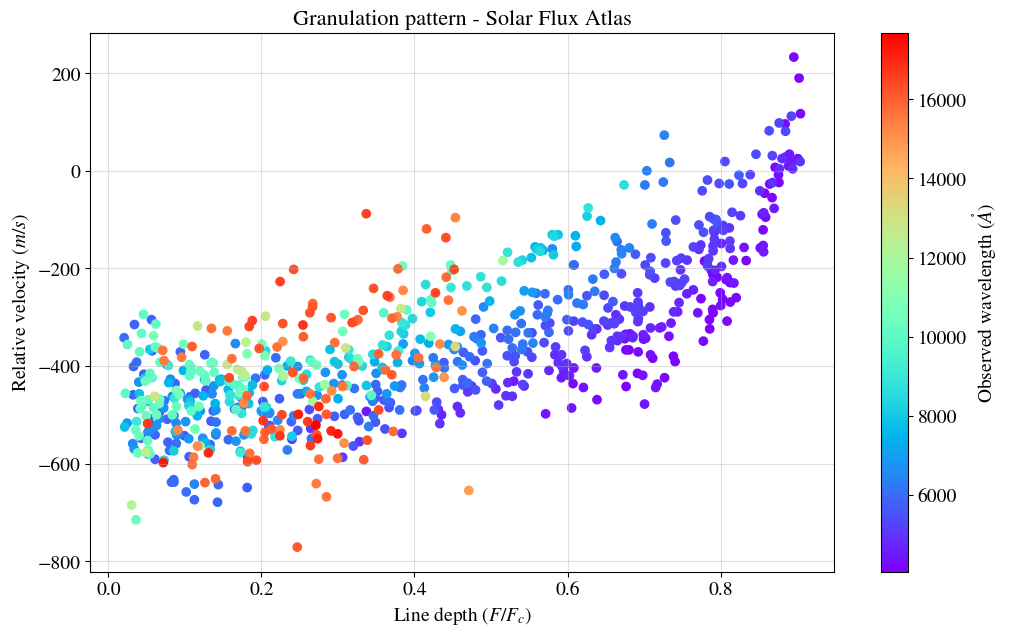

In [ ]:
fig2, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(ALL_data['Line Depth'],ALL_data['Velocity'],c=ALL_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax.set_title('Granulation pattern - Solar Flux Atlas')
ax.set_xlabel(r'Line depth $(F/F_{c})$')
ax.set_ylabel(r'Relative velocity $(m/s)$')

ax.grid(alpha=0.4)

# fig2.savefig('GranulationPattern_ALL')

## Characterization

### Ellwarth standard curve (just for the spatially resolved)

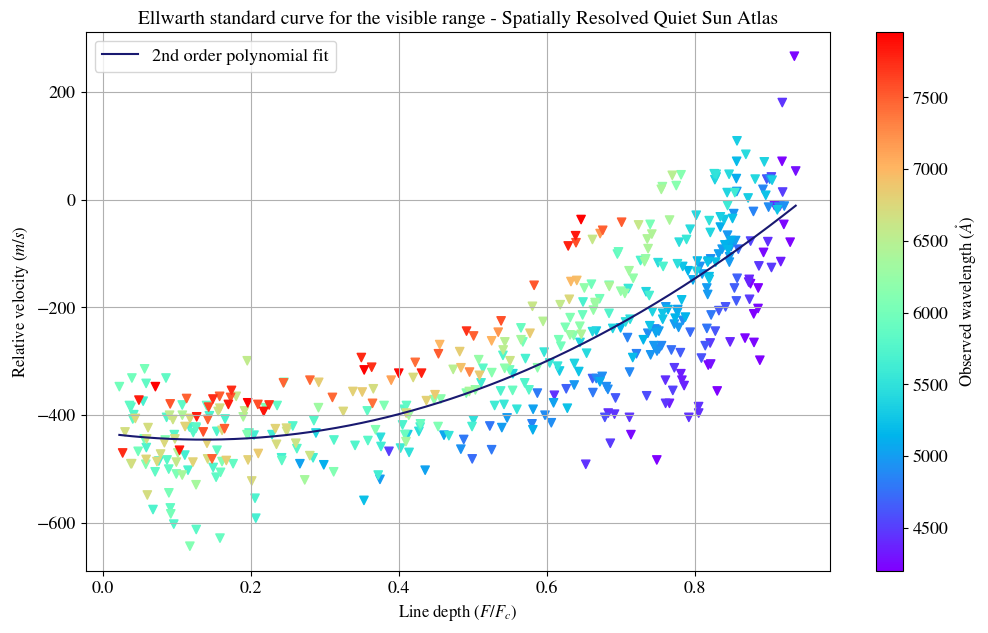

In [ ]:
#The graphic just want to compared the less scattered points

fig4, ax = plt.subplots(1,1,figsize=(12,7))

pol = Polynomial.fit(SPA_data['Line Depth'],SPA_data['Velocity'], 2)
param = pol.convert().coef
values_flux = np.linspace(min(SPA_data['Line Depth']), max(SPA_data['Line Depth']), len(SPA_data))
flux_fit = poly.polyval(values_flux,param)

scatter = ax.scatter(SPA_data['Line Depth'],SPA_data['Velocity'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax.plot(values_flux,flux_fit,color='midnightblue',label='2nd order polynomial fit')

ax.set_title('Ellwarth standard curve for the visible range - Spatially Resolved Quiet Sun Atlas')
ax.set_xlabel(r'Line depth $(F/F_{c})$')
ax.set_ylabel(r'Relative velocity $(m/s)$')
ax.legend()
ax.grid()

# fig4.savefig('Standard curve_Ellwarth')


#### The deeper lines, coming from the spatially center of the sun, are affected by the differential rotation significantly than highest lines

## Wavelength-dependence of line depth for specific velocity

### Visible range

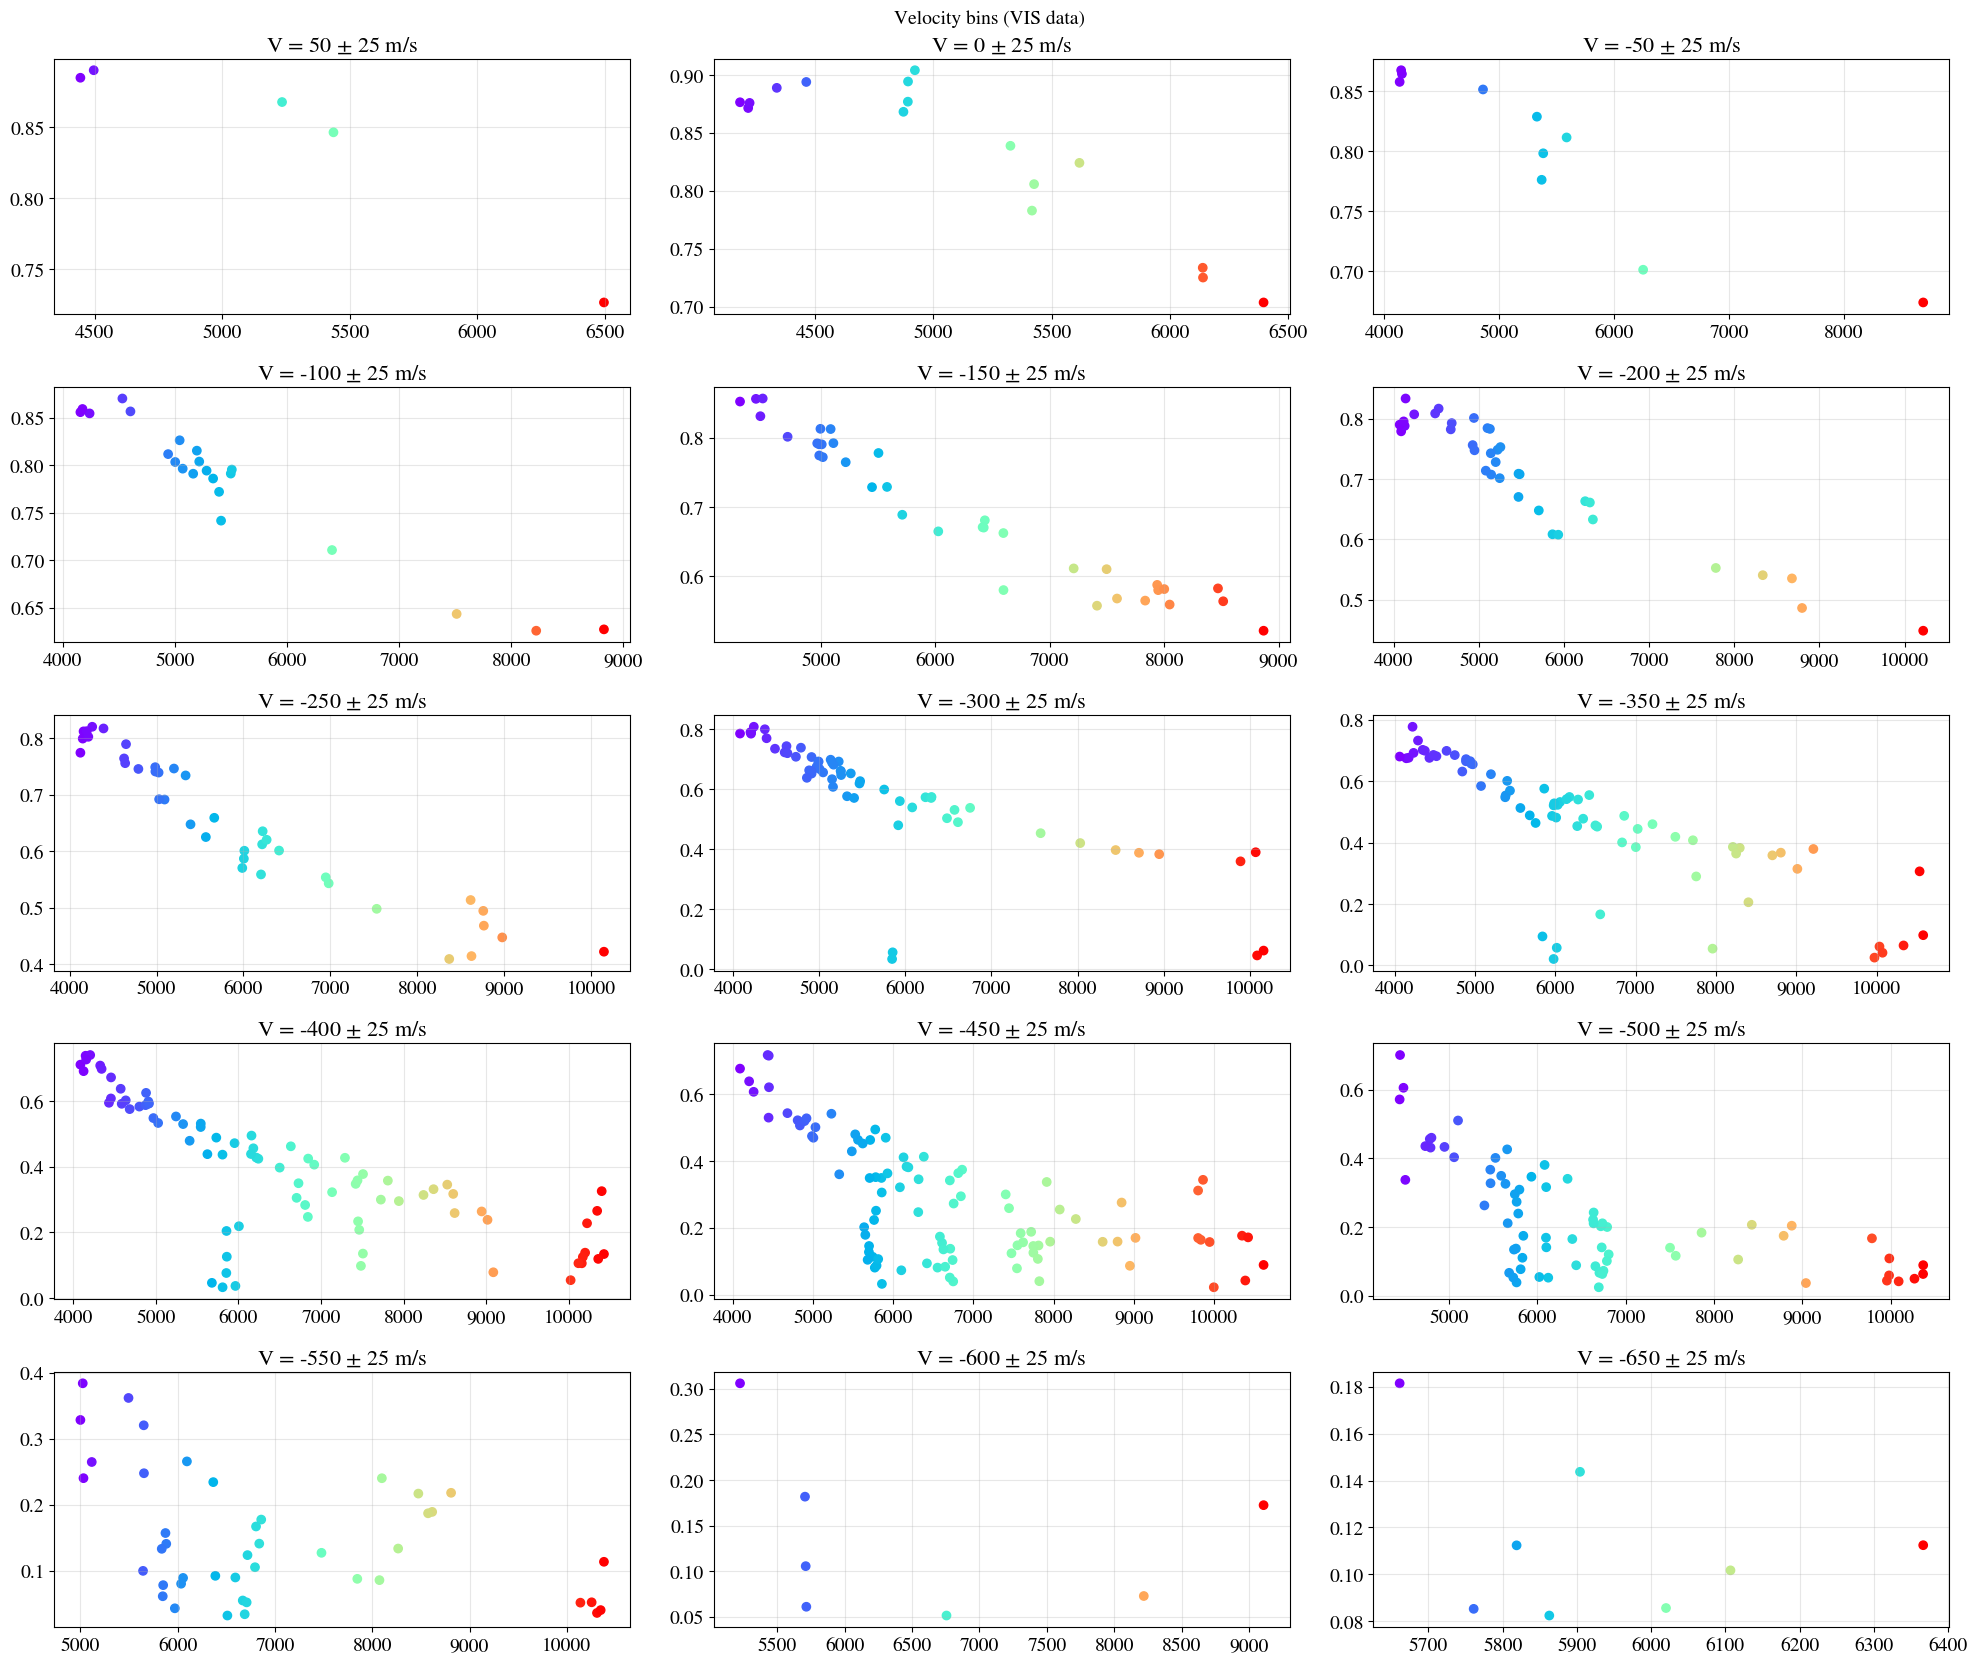

In [7]:
#Organize the dataframe wtih ascending velocities
VIS_listed = VIS_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_VIS = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_VIS.append(VIS_listed[VIS_listed['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins (VIS data)',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_VIS[i]['Observed wavelength'],1-velocity_VIS[i]['Flux'],c=velocity_VIS[i]["Observed wavelength"],cmap='rainbow')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

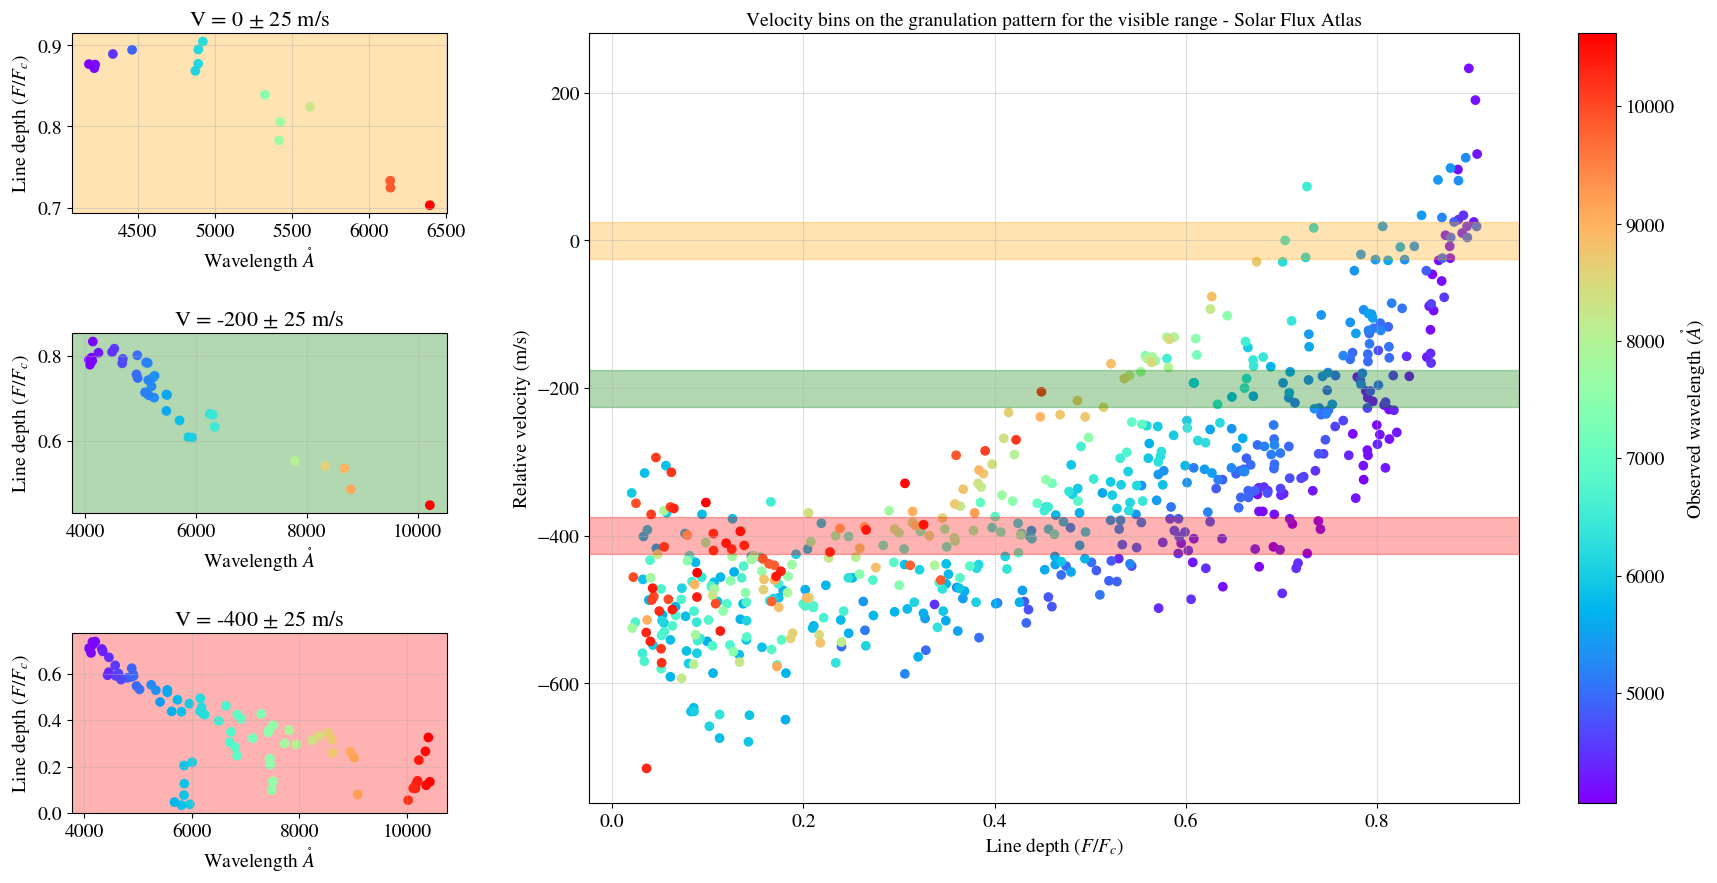

In [ ]:
#Graph with the velocity bins remarked
fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(VIS_data['Line Depth'],VIS_data['Velocity'],c=VIS_data["Observed wavelength"],cmap='rainbow',lw=1,marker='o')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax.set_title('Velocity bins on the granulation pattern for the visible range - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$')
ax.set_ylabel(r'Relative velocity (m/s)')
ax.grid(alpha=0.4)

#Big figure with velocity bins
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Position and size [left, bottom, width, height]
ax_inseti = fig.add_axes([-0.22, 0.7, 0.25, 0.18])
ax_insetj = fig.add_axes([-0.22, 0.4, 0.25, 0.18])
ax_insetk = fig.add_axes([-0.22, 0.1, 0.25, 0.18])

# Graph the zoom
i=1
ax_inseti.scatter(velocity_VIS[i]['Observed wavelength'],velocity_VIS[i]['Line Depth'],c=velocity_VIS[i]["Observed wavelength"],cmap='rainbow')
ax_inseti.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
ax_inseti.set_xlabel(r'Wavelength $\mathring{A}$')
ax_inseti.set_ylabel(r'Line depth $(F/F_{c})$')
ax_inseti.grid(alpha=0.4)

j=5
ax_insetj.scatter(velocity_VIS[j]['Observed wavelength'],velocity_VIS[j]['Line Depth'],c=velocity_VIS[j]["Observed wavelength"],cmap='rainbow')
ax_insetj.set_title(f'V = {markers[j]} $\pm$ 25 m/s')
ax_insetj.set_xlabel(r'Wavelength $\mathring{A}$')
ax_insetj.set_ylabel(r'Line depth $(F/F_{c})$')
ax_insetj.grid(alpha=0.4)

k=9
ax_insetk.scatter(velocity_VIS[k]['Observed wavelength'],velocity_VIS[k]['Line Depth'],c=velocity_VIS[k]["Observed wavelength"],cmap='rainbow')
ax_insetk.set_title(f'V = {markers[k]} $\pm$ 25 m/s')
ax_insetk.set_xlabel(r'Wavelength $\mathring{A}$')
ax_insetk.set_ylabel(r'Line depth $(F/F_{c})$')
ax_insetk.grid(alpha=0.4)


# Marcar la región del zoom en la gráfica principal
ax.axhspan(markers[i]-25, markers[i]+25, alpha=0.3, color='orange')
ax.axhspan(markers[j]-25, markers[j]+25, alpha=0.3, color='green')
ax.axhspan(markers[k]-25, markers[k]+25, alpha=0.3, color='red')

ax_inseti.set_facecolor(color=('orange', 0.3))
ax_insetj.set_facecolor(color=('green', 0.3))
ax_insetk.set_facecolor(color=('red', 0.3))

plt.show()

# fig.savefig('Velocity bins VIS_plot', bbox_inches='tight')

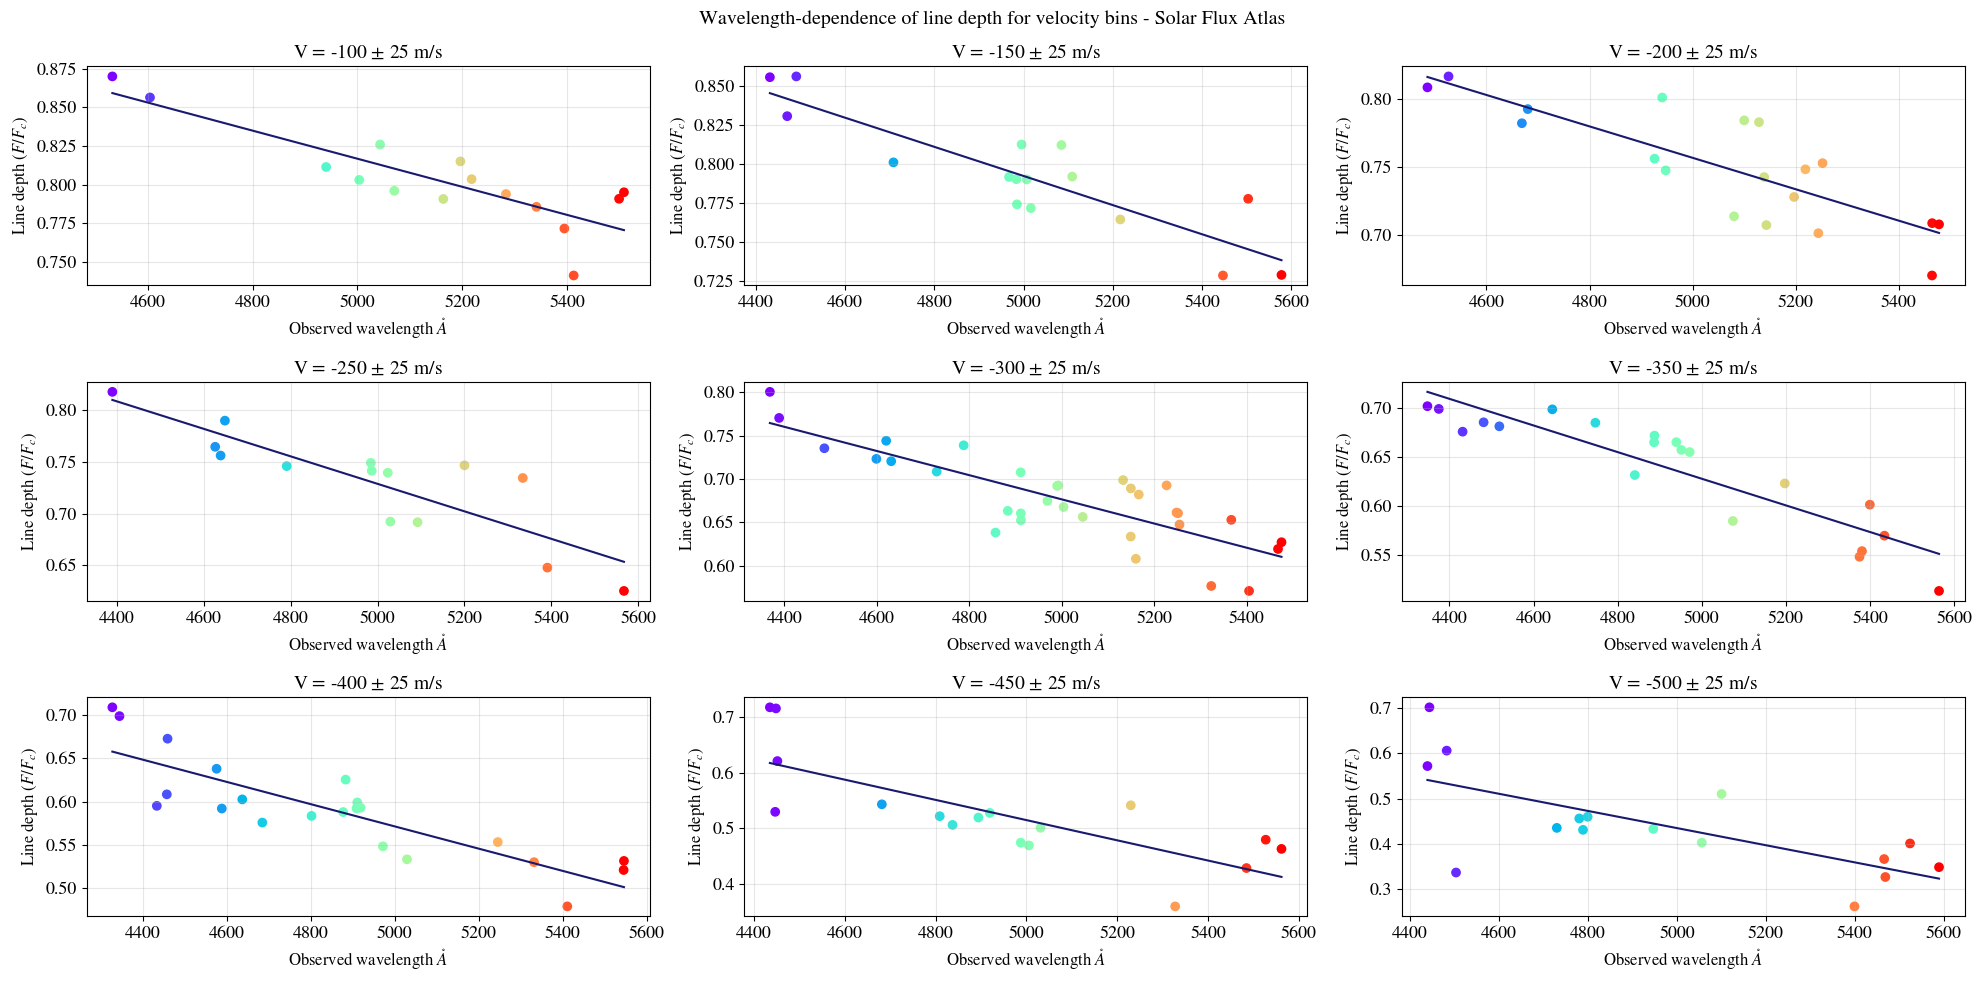

In [38]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_VIS = []
values_param_VIS = []
wave_VIS = []
cov_VIS = []

for i in range(3,12):
    new_data = velocity_VIS[i][velocity_VIS[i]['Observed wavelength'].between(4300,5600, inclusive='neither')]
    _,cov = np.polyfit(new_data['Observed wavelength'],new_data['Line Depth'], 1,cov=True)
    pol = Polynomial.fit(new_data['Observed wavelength'],new_data['Line Depth'], 1)
    param = pol.convert().coef
    values_flux = np.linspace(min(new_data['Observed wavelength']), max(new_data['Observed wavelength']), len(new_data['Observed wavelength']))
    flux_fit = poly.polyval(values_flux,param)

    cov_VIS.append(np.sqrt(np.diag(cov)))
    fits_VIS.append([values_flux,flux_fit])
    values_param_VIS.append(pd.DataFrame(param))
    wave_VIS.append(new_data)

values_param_VIS = pd.concat(values_param_VIS,axis=1).T.reset_index(drop=True)
values_param_VIS.columns = ['Shift','Slope']
values_param_VIS = values_param_VIS.set_axis(markers[3:12], axis=0)

#Take just the values that we want
velocity_VIS_new = velocity_VIS[3:12]
markers_new = markers[3:12]

fig4, axes = plt.subplots(3, 3, figsize=(20, 10))
fig4.suptitle('Wavelength-dependence of line depth for velocity bins - Solar Flux Atlas')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_VIS):
        
        ax.scatter(wave_VIS[i]['Observed wavelength'],wave_VIS[i]['Line Depth'],c=wave_VIS[i]["Observed wavelength"],cmap='rainbow')
        ax.plot(fits_VIS[i][0],fits_VIS[i][1],color='midnightblue')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_ylabel(r'Line depth $(F/F_{c})$')
        ax.set_xlabel(r'Observed wavelength $\mathring{A}$')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# fig4.savefig('Velocity bins VIS')

In [39]:
cov_slope = [each[0] for each in cov_VIS]
cov_shift = [each[1] for each in cov_VIS]
values_param_VIS['Error slope'] = cov_slope
values_param_VIS['Error shift'] = cov_shift
values_param_VIS

,Shift,Slope,Error slope,Error shift
-100,1.270417,-0.000091,0.000015,0.079727
-150,1.260197,-0.000094,0.000013,0.067381
-200,1.334044,-0.000115,0.000019,0.098525
-250,1.392099,-0.000133,0.000023,0.116467
-300,1.372480,-0.000139,0.000017,0.087445
-350,1.310685,-0.000137,0.000015,0.074455
-400,1.211962,-0.000128,0.000018,0.086642
-450,1.421268,-0.000181,0.000039,0.194761
-500,1.378785,-0.000189,0.000052,0.260976


### Spatial data

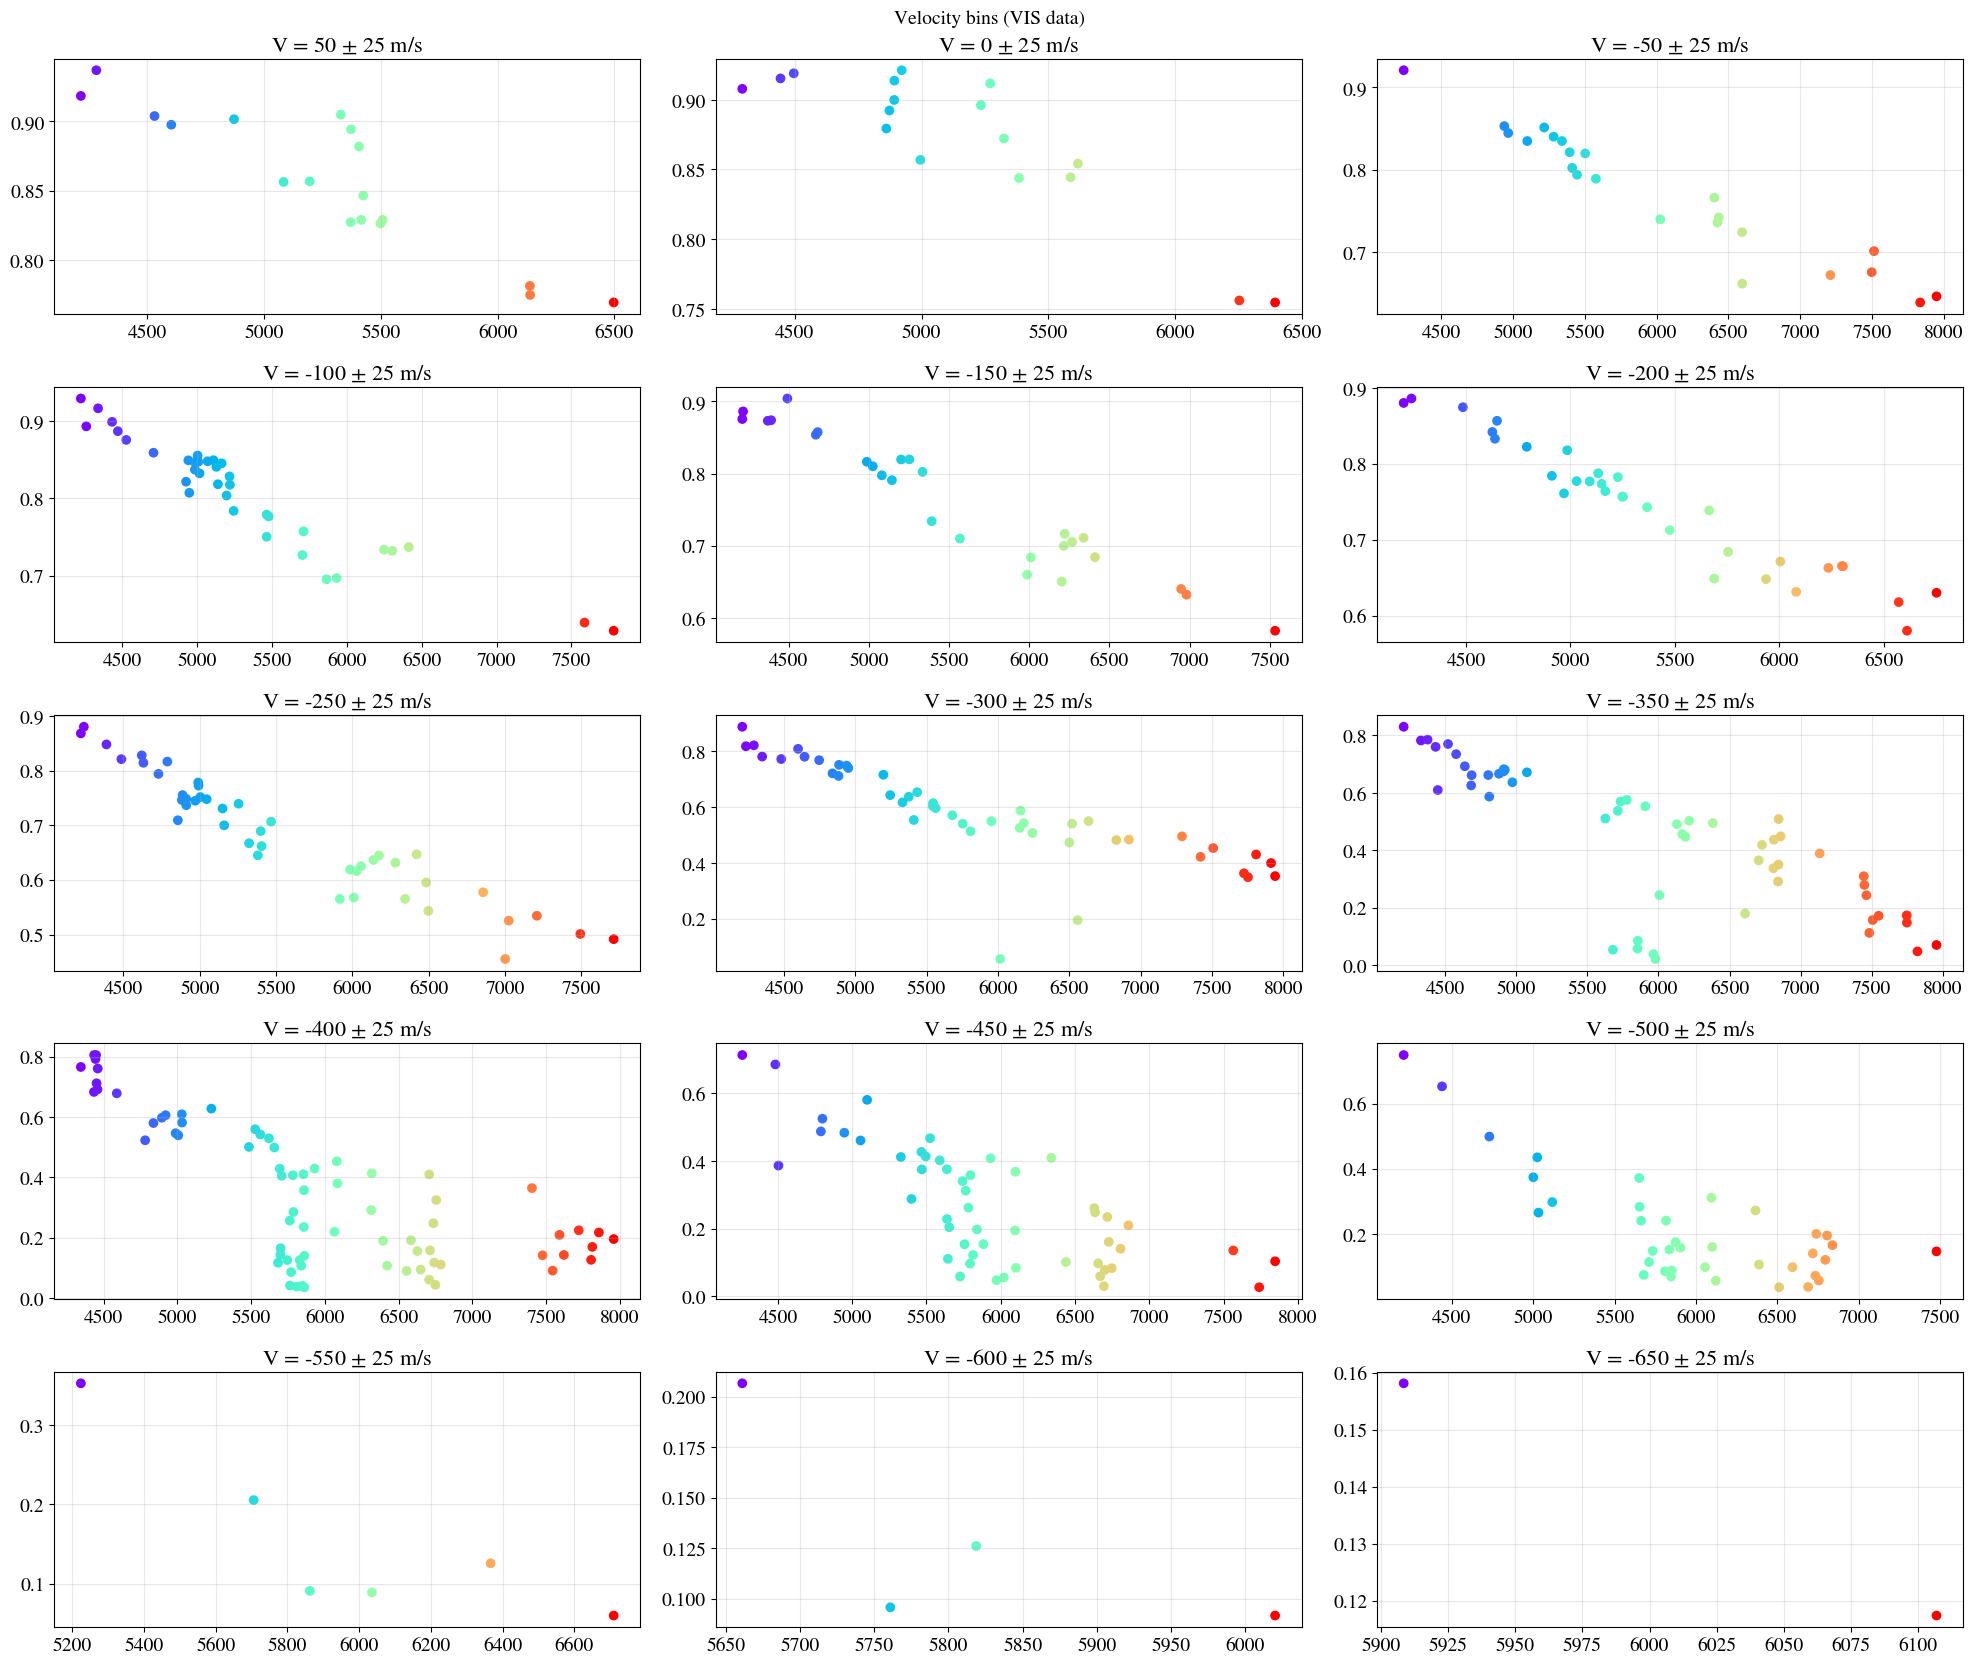

In [9]:
#Organize the dataframe wtih ascending velocities
SPA_listed = SPA_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_SPA = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_SPA.append(SPA_listed[SPA_listed['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins (VIS data)',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_SPA[i]['Observed wavelength'],1-velocity_SPA[i]['Flux'],c=velocity_SPA[i]["Observed wavelength"],cmap='rainbow')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


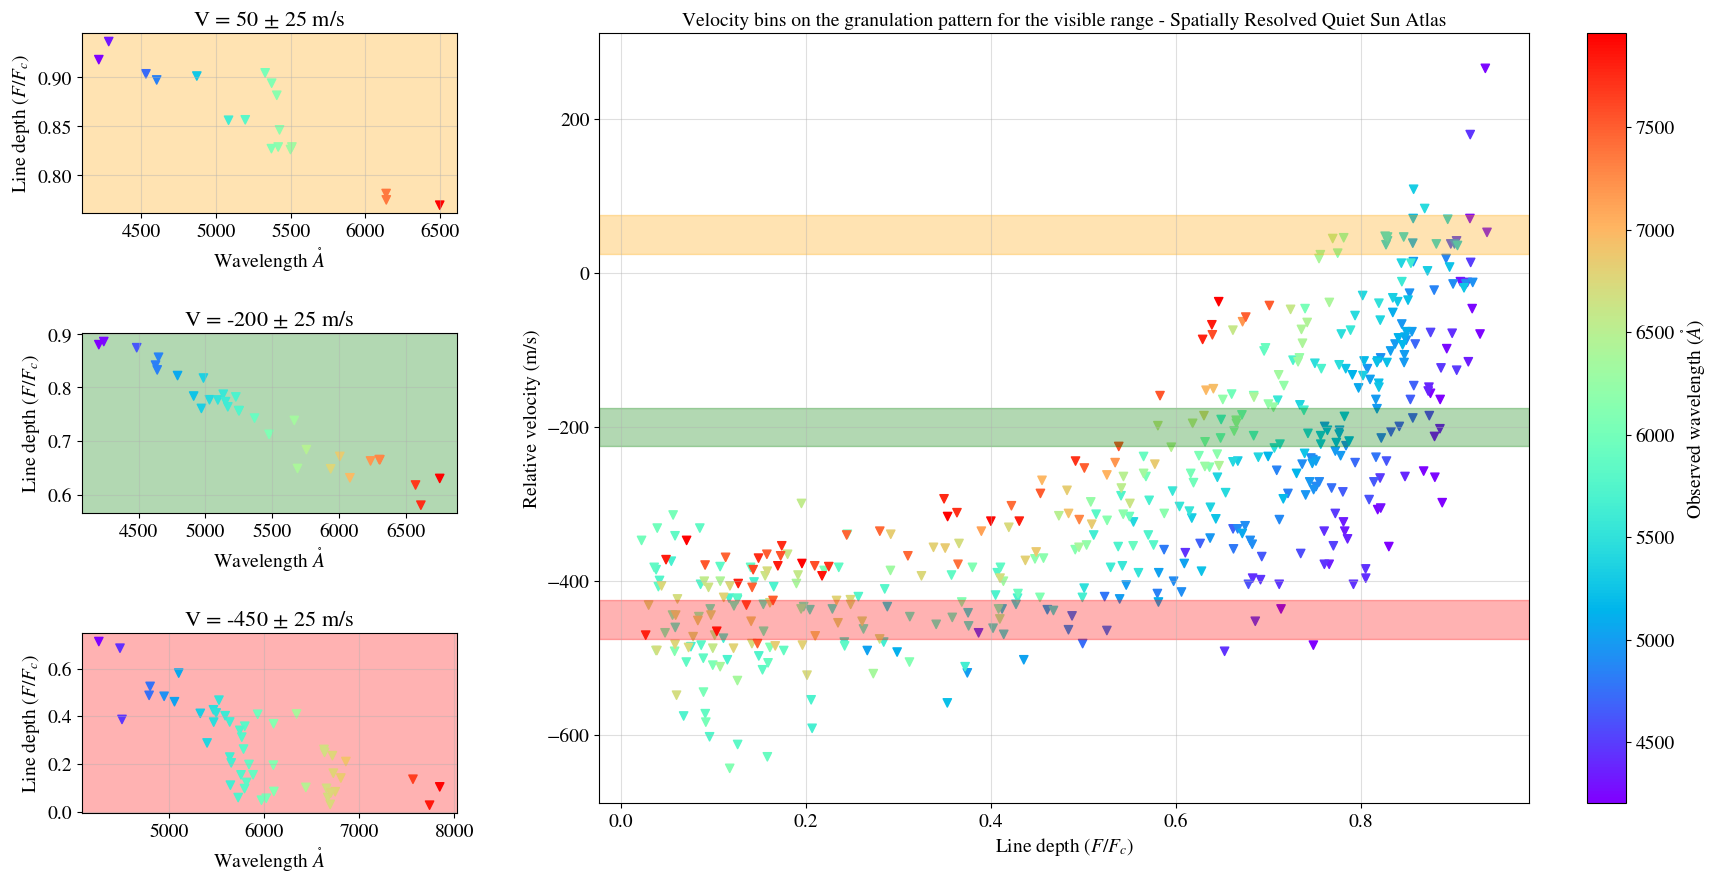

In [ ]:
#Another form to graph
# Crear figura principal
fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(SPA_data['Line Depth'],SPA_data['Velocity'],c=SPA_data["Observed wavelength"],cmap='rainbow',lw=1,marker='v')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$')

ax.set_title('Velocity bins on the granulation pattern for the visible range - Spatially Resolved Quiet Sun Atlas',fontsize=14)
ax.set_xlabel(r'Line depth $(F/F_{c})$')
ax.set_ylabel(r'Relative velocity (m/s)')
ax.grid(alpha=0.4)

# Crear gráfica insertada
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Definir posición y tamaño de la gráfica insertada [left, bottom, width, height]
ax_inseti = fig.add_axes([-0.22, 0.7, 0.25, 0.18])
ax_insetj = fig.add_axes([-0.22, 0.4, 0.25, 0.18])
ax_insetk = fig.add_axes([-0.22, 0.1, 0.25, 0.18])

# Graficar el zoom en la región de interés
i=0
ax_inseti.scatter(velocity_SPA[i]['Observed wavelength'],velocity_SPA[i]['Line Depth'],c=velocity_SPA[i]["Observed wavelength"],cmap='rainbow',marker='v')
ax_inseti.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
ax_inseti.set_xlabel(r'Wavelength $\mathring{A}$')
ax_inseti.set_ylabel(r'Line depth $(F/F_{c})$')
ax_inseti.grid(alpha=0.4)

j=5
ax_insetj.scatter(velocity_SPA[j]['Observed wavelength'],velocity_SPA[j]['Line Depth'],c=velocity_SPA[j]["Observed wavelength"],cmap='rainbow',marker='v')
ax_insetj.set_title(f'V = {markers[j]} $\pm$ 25 m/s')
ax_insetj.set_xlabel(r'Wavelength $\mathring{A}$')
ax_insetj.set_ylabel(r'Line depth $(F/F_{c})$')
ax_insetj.grid(alpha=0.4)

k=10
ax_insetk.scatter(velocity_SPA[k]['Observed wavelength'],velocity_SPA[k]['Line Depth'],c=velocity_SPA[k]["Observed wavelength"],cmap='rainbow',marker='v')
ax_insetk.set_title(f'V = {markers[k]} $\pm$ 25 m/s')
ax_insetk.set_xlabel(r'Wavelength $\mathring{A}$')
ax_insetk.set_ylabel(r'Line depth $(F/F_{c})$')
ax_insetk.grid(alpha=0.4)


# Marcar la región del zoom en la gráfica principal
ax.axhspan(markers[i]-25, markers[i]+25, alpha=0.3, color='orange')
ax.axhspan(markers[j]-25, markers[j]+25, alpha=0.3, color='green')
ax.axhspan(markers[k]-25, markers[k]+25, alpha=0.3, color='red')

ax_inseti.set_facecolor(color=('orange', 0.3))
ax_insetj.set_facecolor(color=('green', 0.3))
ax_insetk.set_facecolor(color=('red', 0.3))


# fig.savefig('Velocity bins SPA_plot', bbox_inches='tight')

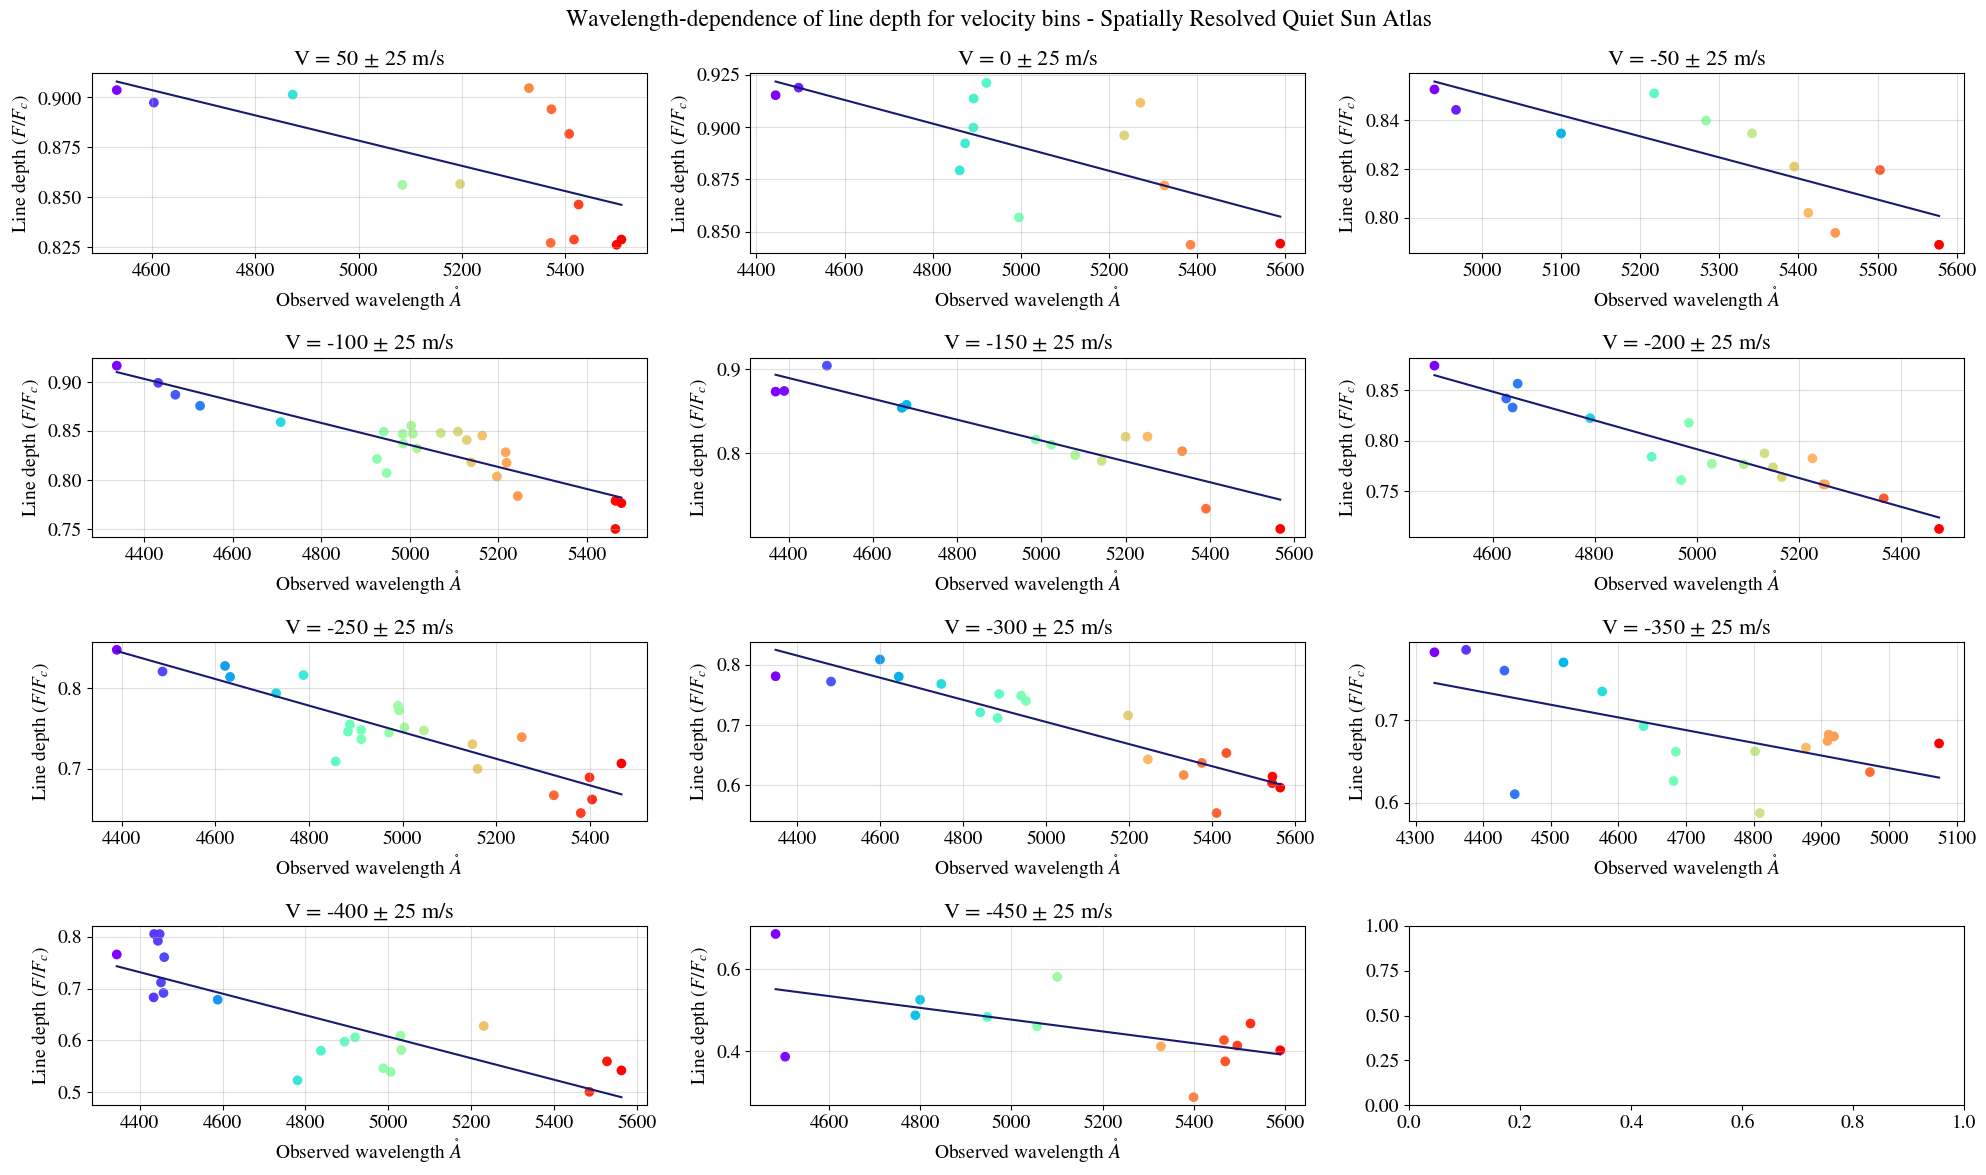

In [ ]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_SPA = []
values_param_SPA = []
wave_SPA = []
cov_SPA = []

for i in range(0,11):
    new_data = velocity_SPA[i][velocity_SPA[i]['Observed wavelength'].between(4300,5600, inclusive='neither')]
    _,cov = np.polyfit(new_data['Observed wavelength'],new_data['Line Depth'], 1,cov=True)
    pol = Polynomial.fit(new_data['Observed wavelength'],new_data['Line Depth'], 1)
    param = pol.convert().coef
    values_flux = np.linspace(min(new_data['Observed wavelength']), max(new_data['Observed wavelength']), len(new_data['Observed wavelength']))
    flux_fit = poly.polyval(values_flux,param)

    cov_SPA.append(np.sqrt(np.diag(cov)))
    fits_SPA.append([values_flux,flux_fit])
    values_param_SPA.append(pd.DataFrame(param))
    wave_SPA.append(new_data)

values_param_SPA = pd.concat(values_param_SPA,axis=1).T.reset_index(drop=True)
values_param_SPA.columns = ['Shift','Slope']
values_param_SPA = values_param_SPA.set_axis(markers[0:11], axis=0)

#Take just the values that we want
velocity_SPA_new = velocity_SPA[0:11]
markers_new = markers[0:11]

fig5, axes = plt.subplots(4, 3, figsize=(20, 12))
fig5.suptitle('Wavelength-dependence of line depth for velocity bins - Spatially Resolved Quiet Sun Atlas')
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_SPA):
        
        ax.scatter(wave_SPA[i]['Observed wavelength'],wave_SPA[i]['Line Depth'],c=wave_SPA[i]["Observed wavelength"],cmap='rainbow')
        ax.plot(fits_SPA[i][0],fits_SPA[i][1],color='midnightblue')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_ylabel(r'Line depth $(F/F_{c})$')
        ax.set_xlabel(r'Observed wavelength $\mathring{A}$')
        ax.grid(alpha=0.4)

fig5.tight_layout()
plt.show()

# fig5.savefig('Velocity bins SPA')

In [41]:
cov_slope = [each[0] for each in cov_SPA]
cov_shift = [each[1] for each in cov_SPA]
values_param_SPA['Error slope'] = cov_slope
values_param_SPA['Error shift'] = cov_shift
values_param_SPA

,Shift,Slope,Error slope,Error shift
50,1.193762,-0.000063,0.000022,0.116601
0,1.172029,-0.000056,0.000018,0.092365
-50,1.284067,-0.000087,0.000021,0.108748
-100,1.395371,-0.000112,0.000012,0.058486
-150,1.432798,-0.000124,0.000017,0.084250
-200,1.502800,-0.000142,0.000013,0.065833
-250,1.571222,-0.000165,0.000018,0.089077
-300,1.623338,-0.000184,0.000019,0.097136
-350,1.412965,-0.000154,0.000055,0.258360
-400,1.645521,-0.000208,0.000033,0.161773


The rotation is not the reason of chromodependence, when we observe the center disk spectrum and measure the rotation is greater than the full disk integrated atlas.